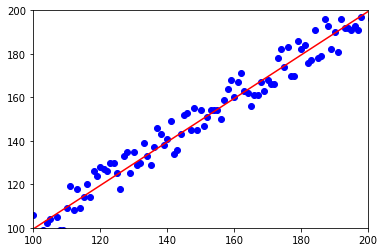

In [10]:
# coding:utf-8
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

sampleSize = 100
x = np.array([i for i in range(1, sampleSize + 1, 1)])
y = np.array([i + np.random.uniform(0, 10) for i in range(sampleSize)])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)
xMean = np.mean(x_train)
yMean = np.mean(y_train)
num = (x_train - xMean).dot(y_train - yMean)  # numerator
d = (x_train - xMean).dot(x_train - xMean)  # denominator
a = num / d
b = yMean - a * xMean
yHat = a * x + b
xPredict = x_test
yPredict = a * xPredict + b    # 后续将x_test的真值与预测值对比得到评价结果
# MSE
mse_test = mean_squared_error(y_test, yPredict)
print("The MSE is:\n", mse_test)
# RMSE
rmse_test = sqrt(mse_test)
print("The RMSE is:\n", rmse_test)
# MAE
mae_test = mean_absolute_error(y_test, yPredict)
print("The MAE is:\n", mae_test)
# R^2
R2 = r2_score(y_test, yPredict)    # sklearn.linear_model.LinearRegression 中的 score 函数直接返回 r2_score 结果
print("The R^2 is:\n", R2)
plt.scatter(x_train, y_train, c='b')
plt.scatter(x_test, y_test, c='g')
plt.scatter(xPredict, yPredict, c='m')
plt.plot(x, yHat, c='r')
plt.show()
